# 8. Train models on VIENNA cohort, validate on external cohorts

- train the 5 models on VIENNA data, run predictions for the other cohorts
- report prediction performance for each model/cohort separately
- as usual, compare different parameter sets:
    - 5-P
    - 3-P
    - 3-P with INR
    - 3-P + LSM
    - 3-P with INR + LSM
- for each parameter set also show distribution of HVPG labels

<sub>original notebook name: `VICIS_19_train_on_VICIS_validate_on_other_datasets.ipynb`</sub>

In [1]:
import pandas as pd
import numpy as np

# prediction models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
import HVPG16_functions

In [3]:
preprocessed_data_path = "/Users/jreinis/OneDrive/Rotation/rotation/data_collaborators_updated_v3/merged_datasets_HVPG_strictly_compensated_center_names.csv"
output_plots_path = "/Users/jreinis/OneDrive/Rotation/rotation/HVPG16_manuscript_figures/models_performance_comparison/"
output_AUCs_path = "/Users/jreinis/OneDrive/Rotation/rotation/results_CVs_AUCs/"

In [4]:
data = pd.read_csv(preprocessed_data_path)
# call liver stiffness just LSM
data.rename(columns = {"VCTE-LSM-kPa":"LSM"}, inplace=True)

In [5]:
models = [LogisticRegression(C = 1, max_iter=15000, warm_start=False),
          MLPClassifier(hidden_layer_sizes=(20,20,20,), max_iter=2000, warm_start=False, alpha=.001),
          RandomForestClassifier(n_estimators = 100, warm_start=False),
          SVC(kernel='rbf', C = 0.8, probability=True),
          XGBClassifier(n_estimators = 100, verbosity = 0)]
names = ["Logistic Reg", "MLP", "Random Forest", "SVM", "XGBoost"]

#### 5-parameter model

5 variables (PLT, BILI, aPTT, CHE, GGT), trained on: VIENNA, 209 patients, 137 HVPG<16, 72 HVPG>=16


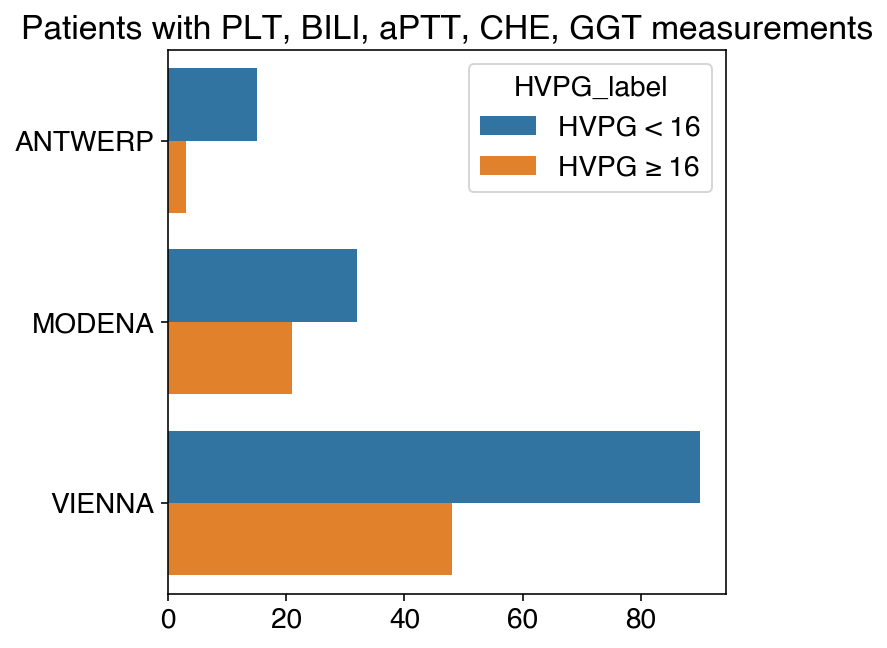

,VIENNA,ANTWERP,MODENA
Logistic Reg,0.897685,0.577778,0.715774
MLP,0.963889,0.555556,0.668155
Random Forest,1.000000,0.555556,0.728423
SVM,0.813657,0.666667,0.654762
XGBoost,1.000000,0.466667,0.737351


In [6]:
variables = ["PLT", "BILI", "aPTT", "CHE", "GGT"]
HVPG16_functions.train_one_cohort_validate_rest(data, models, names, variables, "VIENNA")

#### 3-parameter model

3 variables (PLT, BILI, aPTT), trained on: VIENNA, 720 patients, 445 HVPG<16, 275 HVPG>=16


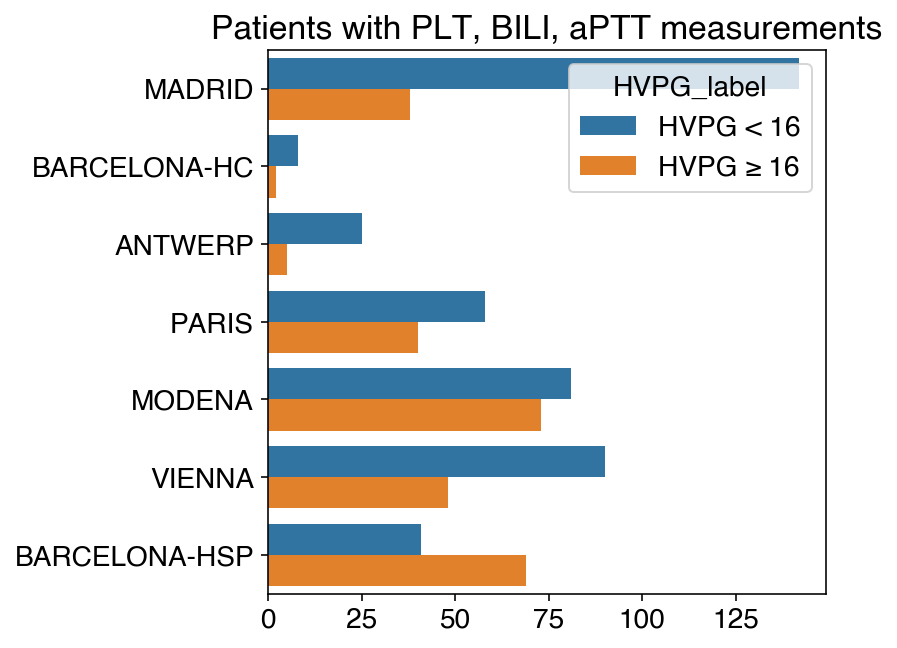

,VIENNA,ANTWERP,BARCELONA-HC,BARCELONA-HSP,MADRID,MODENA,PARIS
Logistic Reg,0.856944,0.472,0.750,0.572994,0.872128,0.740233,0.680603
MLP,0.823611,0.496,0.625,0.535878,0.892328,0.718586,0.661207
Random Forest,1.000000,0.544,0.625,0.577236,0.815789,0.751480,0.672198
SVM,0.814120,0.600,0.625,0.515376,0.867865,0.704380,0.620259
XGBoost,1.000000,0.628,0.625,0.592435,0.772609,0.747167,0.672414


In [7]:
variables = ["PLT", "BILI", "aPTT"]
HVPG16_functions.train_one_cohort_validate_rest(data, models, names, variables, "VIENNA")

#### 3-parameter model (INR)

3 variables (PLT, BILI, INR), trained on: VIENNA, 968 patients, 617 HVPG<16, 351 HVPG>=16


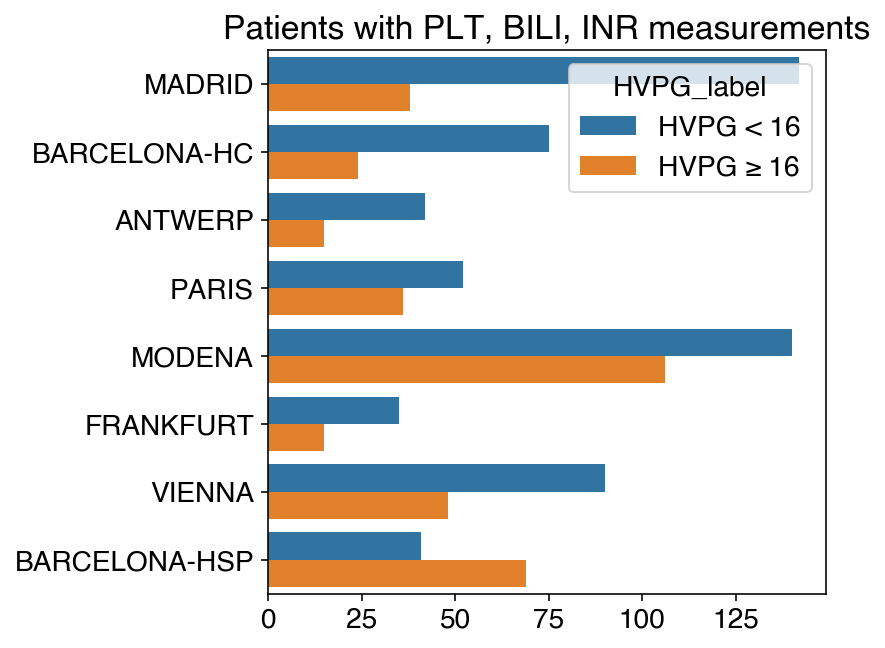

,VIENNA,ANTWERP,BARCELONA-HC,BARCELONA-HSP,FRANKFURT,MADRID,MODENA,PARIS
Logistic Reg,0.811806,0.539683,0.658333,0.539413,0.649524,0.882691,0.723012,0.674145
MLP,0.768519,0.600000,0.652222,0.499823,0.592381,0.874907,0.696664,0.630876
Random Forest,1.000000,0.666667,0.594444,0.548250,0.700952,0.833673,0.704818,0.692308
SVM,0.773958,0.676190,0.658333,0.492047,0.579048,0.858692,0.680896,0.608440
XGBoost,0.998843,0.692063,0.548889,0.530753,0.624762,0.802910,0.704784,0.694444


In [8]:
variables = ["PLT", "BILI", "INR"]
HVPG16_functions.train_one_cohort_validate_rest(data, models, names, variables, "VIENNA")

#### 3-parameter including liver stiffness

4 variables (PLT, BILI, aPTT, LSM), trained on: VIENNA, 513 patients, 334 HVPG<16, 179 HVPG>=16


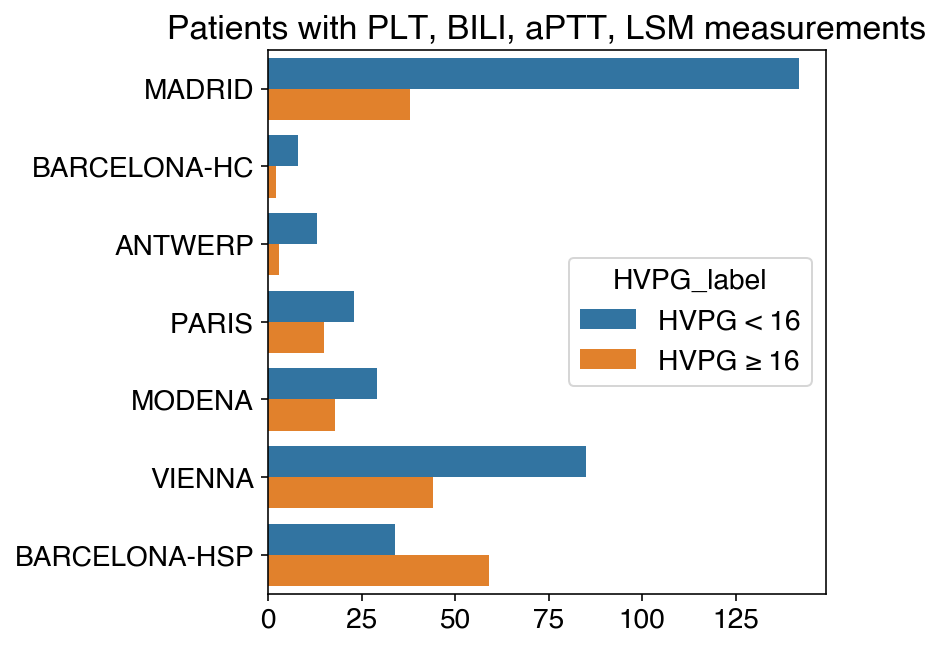

,VIENNA,ANTWERP,BARCELONA-HC,BARCELONA-HSP,MADRID,MODENA,PARIS
Logistic Reg,0.888235,0.461538,0.8750,0.678963,0.901779,0.881226,0.715942
MLP,0.948396,0.564103,0.8750,0.649551,0.872128,0.796935,0.747826
Random Forest,1.000000,0.576923,0.8750,0.677717,0.879540,0.852490,0.752174
SVM,0.871390,0.641026,0.8125,0.664506,0.913084,0.810345,0.785507
XGBoost,1.000000,0.564103,0.8750,0.663509,0.846738,0.837165,0.724638


In [9]:
variables = ["PLT", "BILI", "aPTT", "LSM"]
HVPG16_functions.train_one_cohort_validate_rest(data, models, names, variables, "VIENNA")

#### 3-parameter (INR) including liver stiffness

4 variables (PLT, BILI, INR, LSM), trained on: VIENNA, 628 patients, 422 HVPG<16, 206 HVPG>=16


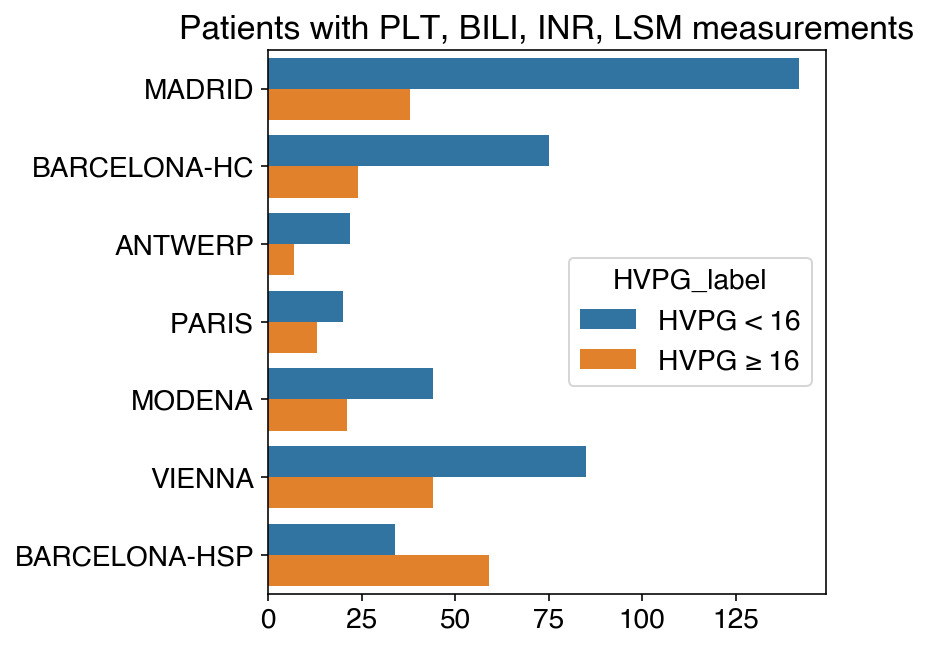

,VIENNA,ANTWERP,BARCELONA-HC,BARCELONA-HSP,MADRID,MODENA,PARIS
Logistic Reg,0.854813,0.597403,0.705556,0.682453,0.917902,0.852814,0.715385
MLP,0.832353,0.590909,0.732222,0.701894,0.944959,0.826840,0.742308
Random Forest,1.000000,0.594156,0.622222,0.647059,0.896034,0.810606,0.767308
SVM,0.846257,0.707792,0.715556,0.666999,0.916049,0.798701,0.784615
XGBoost,1.000000,0.616883,0.602778,0.600698,0.855634,0.799784,0.765385


In [10]:
variables = ["PLT", "BILI", "INR", "LSM"]
HVPG16_functions.train_one_cohort_validate_rest(data, models, names, variables, "VIENNA")